# KNN For Dummies


In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# First trying KNN Classification on a fake dataset
<hr>
X : A 2d array of 500 pairs of integers , each between 0,300  
y : A 1d array which has the class labels  

x<sup>i</sup> has the class label 0 if x<sup>i</sup> is in [0,100)  
x<sup>i</sup> has the class label 1 if x<sup>i</sup> is in [100,200)  
x<sup>i</sup> has the class label 2 if x<sup>i</sup> is in [200,300)  


In [95]:
ys = np.random.randint(300,size=500)
xs = np.arange(500)
X = np.array(list(zip(xs,ys)))
y = np.empty(500,dtype='int')

In [100]:
# Assigning Class Labels 
for i in range(len(X)):
    # Check 1st column of ith row 
    if X[i,1] in range(0,100):
        y[i] = 0
    elif X[i,1] in range(100,200):
        y[i] = 1
    else:
        y[i] =2

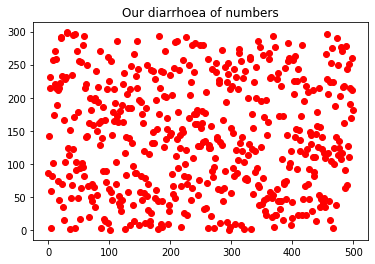

In [94]:
# A picture is worth a thousand words
plt.title("Our diarrhoea of numbers")
plt.plot(X[:,0],X[:,1],'ro')

## Let's split it into training and test set now!

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [103]:
# Let's check
for i in (X_train,X_test,y_train,y_test):
    print(i.shape)

(400, 2)
(100, 2)
(400,)
(100,)


## KNN Classification

In [139]:
N = 3
ourknnclf = KNeighborsClassifier(n_neighbors=N)
ourknnclf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [153]:
ourknnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Now to testing!

In [107]:
predictions = ourknnclf.predict(X_test)

## Evaluation!

### First we use jaccard score which is : size of intersection of two label sets divided by size of union  
<hr> 
It gives us the fraction of predictions that we got right!

In [108]:
jaccard_similarity_score(y_test,predictions)  # first param is the true label, second is our predicted label

0.96

# 96% !

## Now let's try with K=1 to K=10 !

In [174]:
scores =  np.empty(10)
for k in range(1,11):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(X_train,y_train)
    y_hat = knnclf.predict(X_test) # y_hat  stores predicted labels
    scores[k-1] =   jaccard_similarity_score(y_test,y_hat)
    #jaccard score 
    print("k={} , Score = {}".format(k,scores[k-1]))
    

k=1 , Score = 0.97
k=2 , Score = 0.97
k=3 , Score = 0.96
k=4 , Score = 0.95
k=5 , Score = 0.95
k=6 , Score = 0.95
k=7 , Score = 0.95
k=8 , Score = 0.95
k=9 , Score = 0.96
k=10 , Score = 0.96


# SO K = 1(or 2) has the highest accuracy!

## Now let's plot the testing data and get a visual feel! K = 1 

## First we plot the true values 

Text(0.5, 1.0, 'TRUE VALUES')

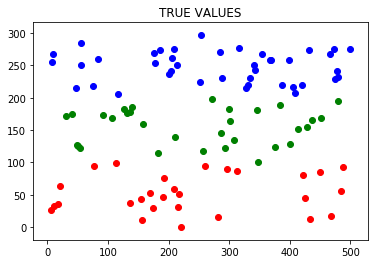

In [146]:
for i in range(len(X_test)):
    x,y =  X_test[i,0],X_test[i,1] 
    if y in range(0,100):
        plt.scatter(x,y,c='red')
    elif y in range(100,200):
        plt.scatter(x,y,c='green')
    else:
         plt.scatter(x,y,c='blue')

plt.title('TRUE VALUES')
#plt.legend(loc=2)

In [159]:
clf_new = KNeighborsClassifier(n_neighbors=1)

In [161]:
clf_new.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [162]:
Y_hats = clf_new.predict(X_test)

In [175]:
Y_hats

array([1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1])

In [179]:
for i in range(len(Y_hats)):
    count = 1
    if Y_hats[i]!=y_test[i]:
        print(i)

        

1
16
65


In [182]:
Y_hats[1]

1

# NOw let's plot the predicted values according to the following rule - 
## If class label of that point is 0 then red ,1 then green , 2 then blue

Text(0.5, 1.0, 'PREDICTED VALUES(GREY VALUES WERE THE MISCLASSIFIED ONES)')

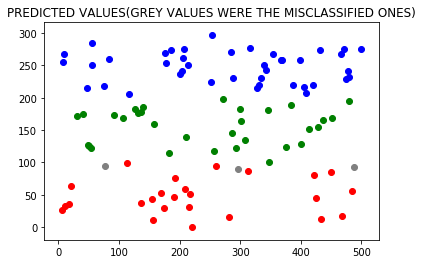

In [183]:
for i in range(len(X_test)):
    if y_test[i] == Y_hats[i]:
        if Y_hats[i] == 0:
            plt.scatter(X_test[i,0],X_test[i,1],c='red')
        elif Y_hats[i] == 1:
            plt.scatter(X_test[i,0],X_test[i,1],c='green')
        else:
            plt.scatter(X_test[i,0],X_test[i,1],c='blue')
    else:
         plt.scatter(X_test[i,0],X_test[i,1],c='grey')
        

plt.title('PREDICTED VALUES(GREY VALUES WERE THE MISCLASSIFIED ONES)')

## So in our K = 1 KNN example plot above, 3 values have been assigned incorrect class which makes sense as our Jaccard score for K=1 was 97%! 
<hr> 
